51406
         latitude   longitude  Frequency
0       37.774929 -122.419415      17049
1       40.714269  -74.005973      16753
2       39.739154 -104.984703      16572
3       34.052234 -118.243685      14445
4       47.606209 -122.332071      12166
...           ...         ...        ...
99996   21.292063 -157.838589          5
99997   33.284900  131.472160          5
99998   29.785180  -95.450991          5
99999   37.250259 -121.859552          5
100000  35.703118  139.771682          5

[100001 rows x 3 columns]


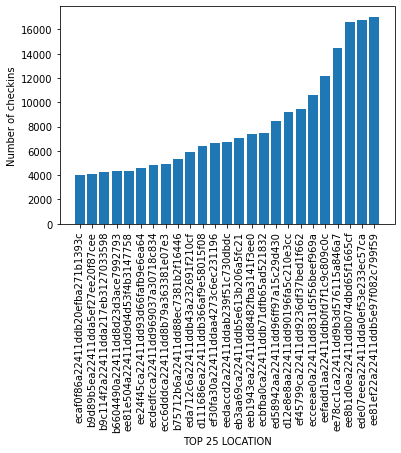

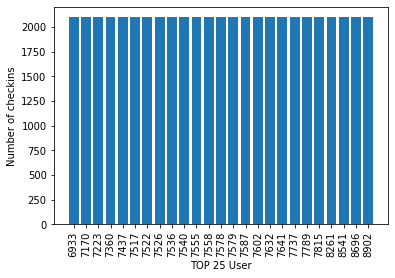

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
checkins1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Brightkite_totalCheckins.txt",delimiter='\t');
checkins1=checkins1.drop_duplicates();
checkins=checkins1.to_numpy();
locationdict={};userdic={};
latlong={};
for i in checkins:
  if(isinstance(i[-1],str)):
    if(i[-1] not in locationdict):
      locationdict[i[-1]]=1;
      l1=[];
      l1.append(i[2]);l1.append(i[3]);
      latlong[i[-1]]=l1;
    else:
      locationdict[i[-1]]=1+locationdict[i[-1]]
  if(isinstance(i[0],int)):
    if(str(i[0]) not in userdic):
      userdic[str(i[0])]=1;
    else:
      userdic[str(i[0])]=1+userdic[str(i[0])]

locationdict=(sorted(locationdict.items(), key = 
             lambda kv:(kv[1], kv[0])))[:-1]
print(len(userdic))
userdic=(sorted(userdic.items(), key = 
             lambda kv:(kv[1], kv[0])))[-25:]
dataframe=[];
freq=[];
counter=0;
for i in locationdict:
  n=len(locationdict)-1;
  key=locationdict[n-counter][0];
  value=locationdict[n-counter][1];
  arr=latlong[key];
  freq.append(value);
  arr.append(value);
  dataframe.append(arr);
  if(counter==100000):
    break;
  counter+=1;

df1=pd.DataFrame(data=dataframe, columns=['latitude', 'longitude', 'Frequency']);
print(df1)
locationdict=locationdict[-25:]

locations=[];f1=[];
for i in locationdict:
  f1.append(i[1]);locations.append(i[0]);
plt.bar(locations,f1);
plt.xlabel("TOP 25 LOCATION");plt.ylabel("Number of checkins");
plt.xticks(rotation=90);
plt.show();

users=[];f2=[];
for i in userdic:
  f2.append(i[1]);users.append(i[0]);
plt.bar(users,f2);
plt.xlabel("TOP 25 User");plt.ylabel("Number of checkins");
plt.xticks(rotation=90);
plt.show();

# Making HeatMap

from scipy.interpolate import interp1d
import plotly.express as px

r1=interp1d([1,max(freq)],[5,18])
radius1=r1(freq);
fig=px.density_mapbox(df1,lat='latitude',lon='longitude', radius=radius1,zoom=0,mapbox_style='stamen-terrain');
fig.show()

topuser=userdic[1][0];
toplocation=locationdict[-1][0]
# Time-Series Graph


import plotly.graph_objects as go
dates1={};time={};date2={};
for i in checkins:
  if(isinstance(i[1], str)):
    if(str(i[0])==topuser):
      d1=i[1][:10];
      if(not d1 in dates1.keys()):
        dates1[d1]=1;
      else:
        dates1[d1]+=1
    if(i[-1]==toplocation):
      d1=i[1][:10];
      if(not d1 in date2.keys()):
        date2[d1]=1;
      else:
        date2[d1]+=1
      


sorteddate=sorted(dates1.items(),key=lambda item: item[0])
l1=[];l2=[];
for i in sorteddate:
  l1.append(i[0]);l2.append(i[1]);
fig_id=go.Figure([go.Scatter(x=l1, y=l2)])
fig_id.show();


In [ ]:
sorteddate=sorted(date2.items(),key=lambda item: item[0])
l1=[];l2=[];
for i in sorteddate:
  l1.append(i[0]);l2.append(i[1]);
fig_id=go.Figure([go.Scatter(x=l1, y=l2)])
fig_id.show();